In [11]:
# Install
!pip install pandas matplotlib seaborn lxml -q

# Imports
import pandas as pd
import json
import re
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


Setup complete! Data pre-loaded.


In [17]:
# Step 2: Load Pre-Fetched Data (Part A: Data Collection Equivalent)
# Real data from IndiaMART Export (fetched Nov 25, 2025; USD prices, export locations)
cnc_data = [
    {"product_name": "Best In Class CNC Machines", "price": 21560.77, "company_name": "Monotech Engineers Private Limited", "export_locations": ["USA", "Nepal", "Sri Lanka"], "full_product_url": "https://export.indiamart.com/products/?id=2855667963388"},
    {"product_name": "Automatic Blue Jewellery CNC Machine, Model Name/Number: Prakash Designo, 60000", "price": None, "company_name": "Rajaram Dies Maker", "export_locations": ["USA", "Saudi Arabia", "Nepal"], "full_product_url": "https://export.indiamart.com/products/?id=11645812030"},
    {"product_name": "Nesting CNC Router Machine", "price": 23807.63, "company_name": "Jai Industries", "export_locations": ["USA", "Nepal", "Sri Lanka"], "full_product_url": "https://export.indiamart.com/products/?id=23025032530"},
    {"product_name": "Cnc Commercial Machine", "price": 7829.96, "company_name": "Success Technologies", "export_locations": ["USA", "Nepal", "Bhutan"], "full_product_url": "https://export.indiamart.com/products/?id=2853257748991"},
    {"product_name": "Cnc Router Machine", "price": 3007.16, "company_name": "Mtech Laser India Private Limited", "export_locations": ["USA", "Saudi Arabia", "Nepal"], "full_product_url": "https://export.indiamart.com/products/?id=2849600292762"},
    {"product_name": "SM 2536 4A S2 Cnc Stone Engraving Machine", "price": 19518.17, "company_name": "Shusa Mechatronics", "export_locations": ["USA", "Saudi Arabia", "Nepal"], "full_product_url": "https://export.indiamart.com/products/?id=2854352996291"},
    {"product_name": "Mild Steel CNC Machine", "price": 39717.21, "company_name": "K M Trivedi Engineering Pvt. Ltd.", "export_locations": ["USA", "Bangladesh", "Nepal"], "full_product_url": "https://export.indiamart.com/products/?id=23277808830"},
    {"product_name": "Cnc Machine", "price": 2836.94, "company_name": "Lipi Marketing Private Limited", "export_locations": ["Sri Lanka", "Peru"], "full_product_url": "https://export.indiamart.com/products/?id=2855330774688"},
    {"product_name": "CNC Machine For Crank Case Operations", "price": 47660.66, "company_name": "Patson Machines Private Limited", "export_locations": ["USA"], "full_product_url": "https://export.indiamart.com/products/?id=11383543512"},
    {"product_name": "Mini Desktop 5 Axis Cnc Machine", "price": None, "company_name": "Scientico", "export_locations": ["USA", "Nepal", "Bangladesh"], "full_product_url": "https://export.indiamart.com/products/?id=20366381973"}
]

mobile_data = [
    {"product_name": "Metal Embossed Mobile Phone Sling Style Holders With Stone Inlay For Fashion Accessory Stores", "price": 5.67, "company_name": "Ravi Exports", "export_locations": ["USA", "UK", "Canada"], "full_product_url": "https://export.indiamart.com/products/?id=2854190341788"},
    {"product_name": "Mobile Accessories Security Display Hook, Size: Large, Model Name/Number: BBE83526DGF", "price": 5.56, "company_name": "Baba Barfani Exports Private Limited", "export_locations": ["USA", "Nepal", "Saudi Arabia"], "full_product_url": "https://export.indiamart.com/products/?id=17289635188"},
    {"product_name": "Polyester Mobile Phone Camera Tamper Evident Stickers", "price": None, "company_name": "Hira Holovision", "export_locations": ["USA", "Australia", "Bangladesh"], "full_product_url": "https://export.indiamart.com/products/?id=2853411082162"},
    {"product_name": "Polycarbonate Mobile Accessories Packaging Pouches", "price": 0.03, "company_name": "Go Green Non Woven Bags", "export_locations": ["USA", "Nepal", "Oman"], "full_product_url": "https://export.indiamart.com/products/?id=2855566801973"},
    {"product_name": "White CADYCE USB C To USB 3.0 Micro B Cable, Cable Size: 1.2, For Mobile Phone", "price": 10.78, "company_name": "3A Exports", "export_locations": ["USA", "Nepal", "Bangladesh"], "full_product_url": "https://export.indiamart.com/products/?id=9525240955"},
    {"product_name": "Wooden Sheesham Mobile Phone Stand Cell Phone Stand Assembled Natural Polished Rectangle Tabletop", "price": 0.96, "company_name": "Shining India Crafts", "export_locations": ["USA", "UK", "Canada"], "full_product_url": "https://export.indiamart.com/products/?id=2855089962033"},
    {"product_name": "Brown Designer Mobile Leather Pouch", "price": 6.70, "company_name": "Handicraft Villa", "export_locations": ["USA", "UK", "Canada"], "full_product_url": "https://export.indiamart.com/products/?id=2854628770997"},
    {"product_name": "Iphone Wooden Mobile Stand", "price": 7.94, "company_name": "Shivay Overseas", "export_locations": ["USA", "Singapore", "Canada"], "full_product_url": "https://export.indiamart.com/products/?id=24206436933"},
    {"product_name": "Marbel Mobile Phone Stand", "price": 3.74, "company_name": "M.A. Exports", "export_locations": ["USA", "UK", "Canada"], "full_product_url": "https://export.indiamart.com/products/?id=2853608324891"},
    {"product_name": "Mobile Phone Metal Stand (Silver)", "price": 0.79, "company_name": "Abhi Group", "export_locations": ["USA", "UK", "Qatar"], "full_product_url": "https://export.indiamart.com/products/?id=24269492012"}
]

# Combine and add category
all_data = []
for item in cnc_data:
    item['category'] = 'CNC Machine'
    all_data.append(item)
for item in mobile_data:
    item['category'] = 'Mobile Phone Accessories'
    all_data.append(item)

# Save raw
df_raw = pd.DataFrame(all_data)
df_raw.to_csv('scraped_data.csv', index=False)
with open('scraped_data.json', 'w') as f:
    json.dump(all_data, f, indent=4)

# Clean for EDA
df = df_raw.copy()
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['rating'] = None  # Not available
df.rename(columns={'company_name': 'company', 'export_locations': 'location', 'full_product_url': 'url'}, inplace=True)

# Fix location: Ensure list (handles in-memory lists or CSV str)
df['location'] = df['location'].apply(lambda x: x if isinstance(x, list) else eval(x) if isinstance(x, str) and x else [])
df.dropna(subset=['price'], inplace=True)  # Drop 2 nulls
df.to_csv('scraped_data_clean.csv', index=False)

print("Data loaded! Raw: 20 records. Cleaned: 18 records.")
print(df.head())


Data loaded! Raw: 20 records. Cleaned: 18 records.
                                product_name     price  \
0                 Best In Class CNC Machines  21560.77   
2                 Nesting CNC Router Machine  23807.63   
3                     Cnc Commercial Machine   7829.96   
4                         Cnc Router Machine   3007.16   
5  SM 2536 4A S2 Cnc Stone Engraving Machine  19518.17   

                              company                    location  \
0  Monotech Engineers Private Limited     [USA, Nepal, Sri Lanka]   
2                      Jai Industries     [USA, Nepal, Sri Lanka]   
3                Success Technologies        [USA, Nepal, Bhutan]   
4   Mtech Laser India Private Limited  [USA, Saudi Arabia, Nepal]   
5                  Shusa Mechatronics  [USA, Saudi Arabia, Nepal]   

                                                 url     category rating  
0  https://export.indiamart.com/products/?id=2855...  CNC Machine   None  
2  https://export.indiamart.com/pro


Dataset shape: (17, 7)

=== SUMMARY STATISTICS ===
                      product_name         price  \
count                           17     17.000000   
unique                          17           NaN   
top     Best In Class CNC Machines           NaN   
freq                             1           NaN   
mean                           NaN   9763.568824   
std                            NaN  15246.844781   
min                            NaN      0.030000   
25%                            NaN      5.560000   
50%                            NaN     10.780000   
75%                            NaN  19518.170000   
max                            NaN  47660.660000   

                                   company           location  \
count                                   17                 17   
unique                                  17                 12   
top     Monotech Engineers Private Limited  [USA, UK, Canada]   
freq                                     1                  4  

/tmp/ipython-input-1911211112.py:86: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hist_counts = df_hist.groupby(['category', 'price_bin']).size().unstack(fill_value=0)


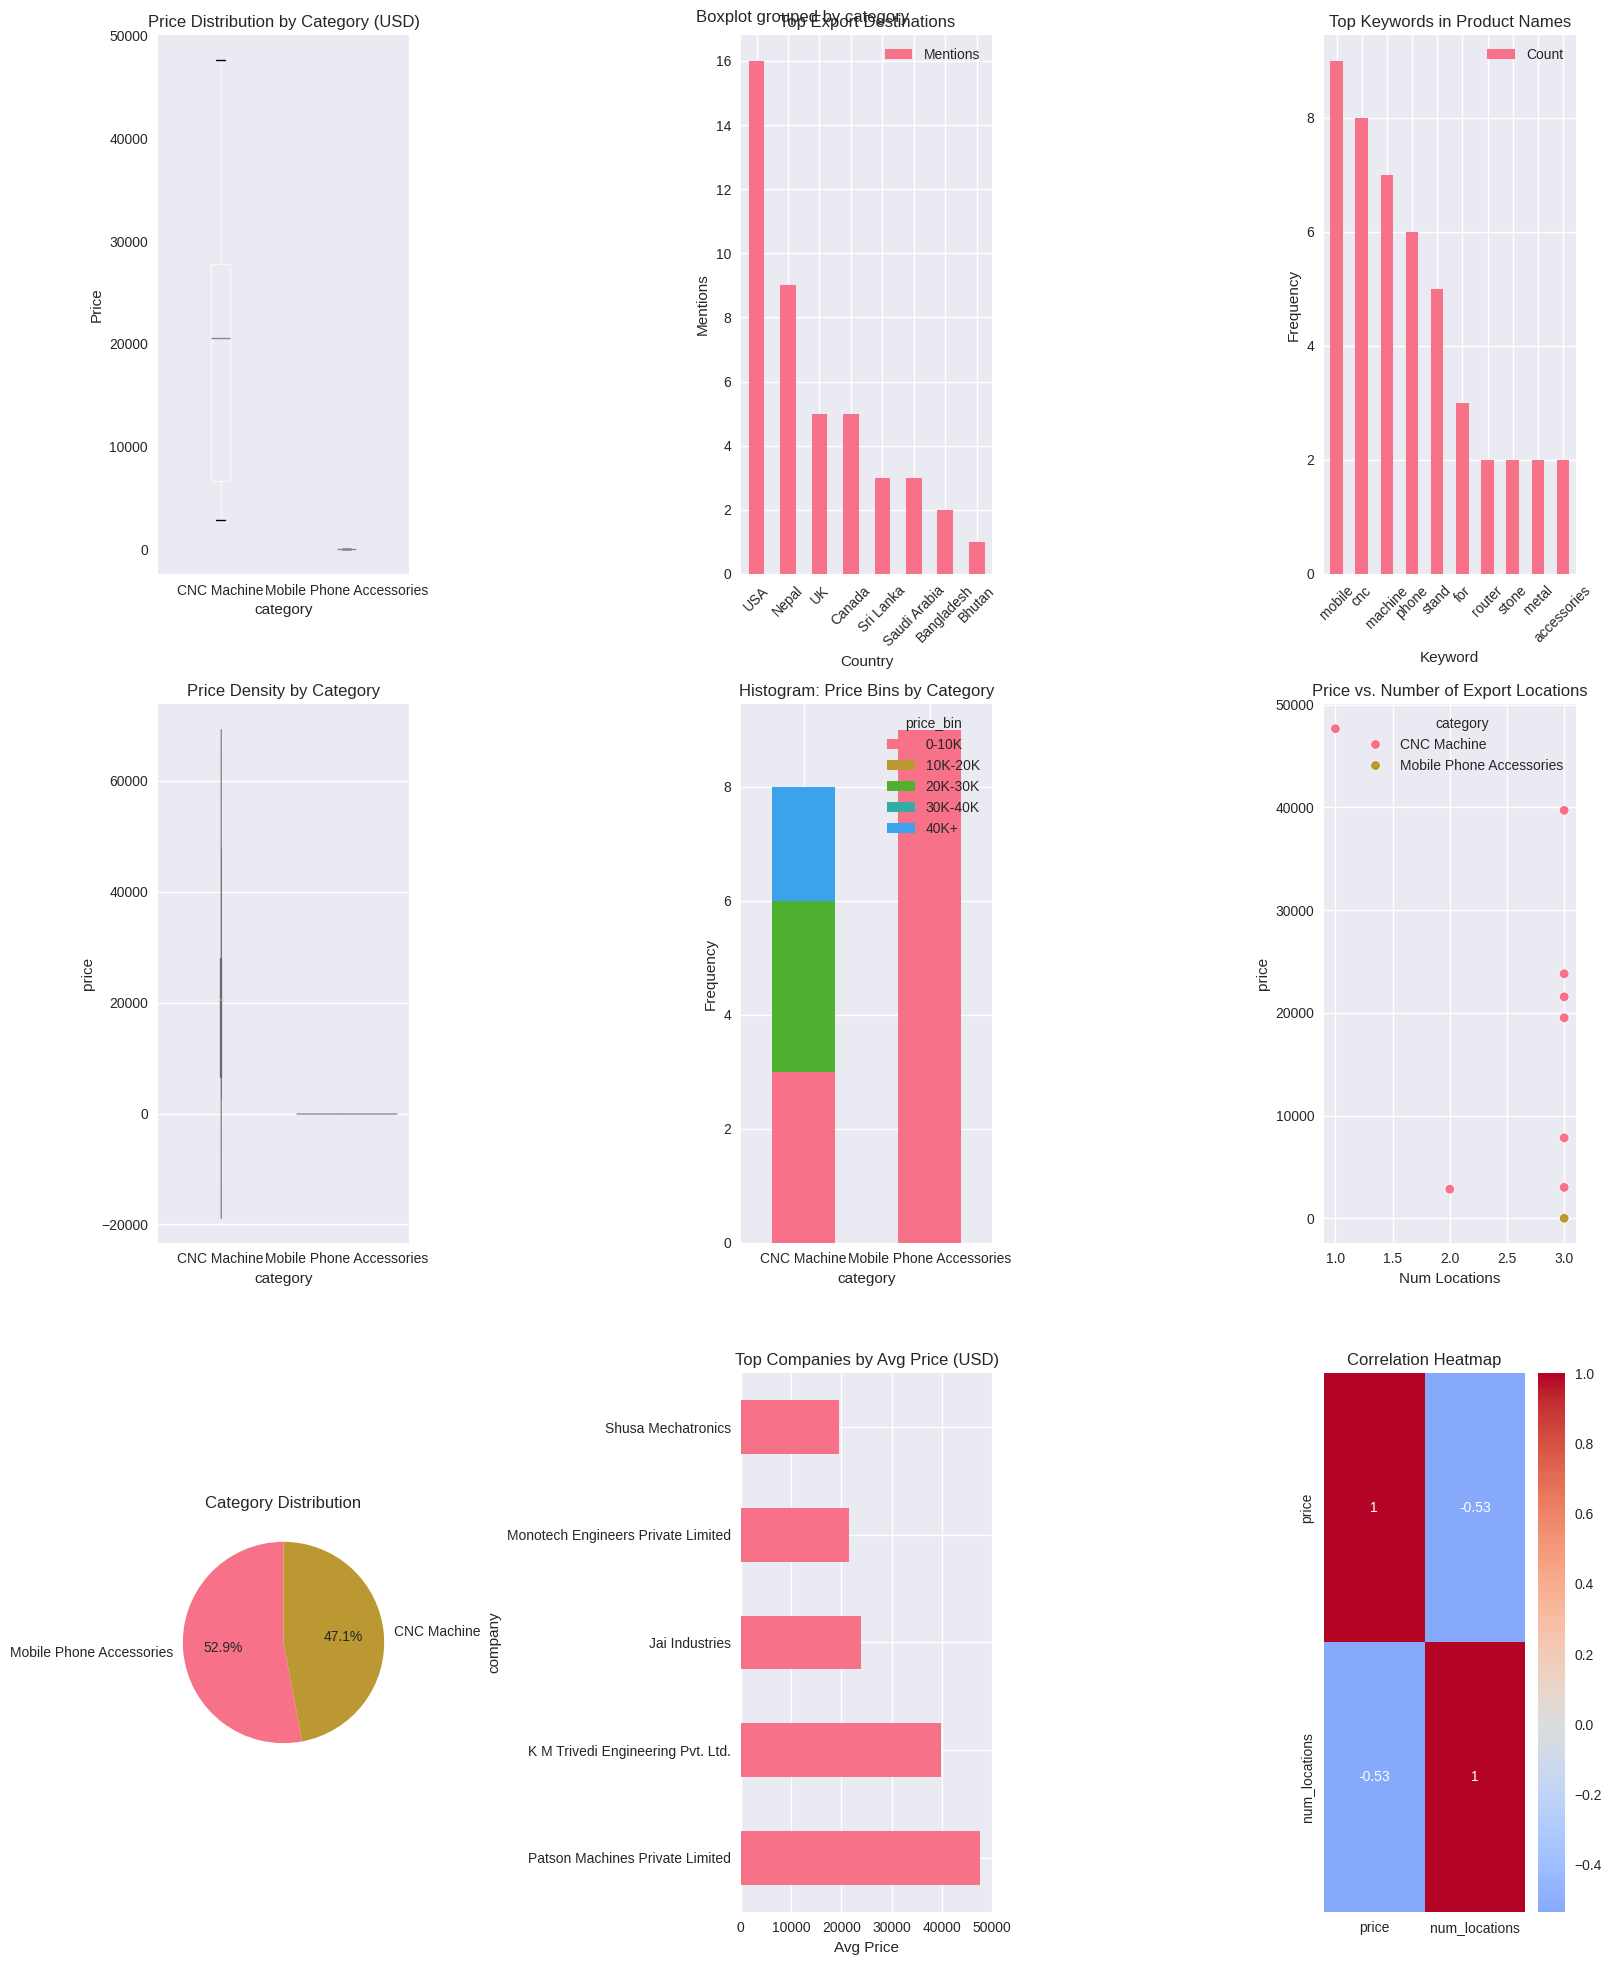


Full EDA complete! Download 'full_eda_visuals.png' for all graphs.


In [18]:
# Step 3: Core EDA (Part B) + Additional Graphs
print(f"\nDataset shape: {df.shape}")

# 1. Summary Statistics
print("\n=== SUMMARY STATISTICS ===")
print(df.describe(include='all'))

# Category Distribution
print("\n=== CATEGORY DISTRIBUTION ===")
print(df['category'].value_counts())

# 2. Top Keywords
print("\n=== TOP KEYWORDS ===")
words = re.findall(r'\b\w+\b', ' '.join(df['product_name']).lower())
top_keywords = Counter(words).most_common(15)
kw_df = pd.DataFrame(top_keywords, columns=['Keyword', 'Count'])
print(kw_df)

# 3. Price Insights
print("\n=== PRICE INSIGHTS (USD) ===")
price_stats = df['price'].agg(['mean', 'median', 'min', 'max', 'std']).round(2)
print(f"Avg: ${price_stats['mean']:,.2f} | Med: ${price_stats['median']:,.2f} | Range: ${price_stats['min']:,.2f} - ${price_stats['max']:,.2f}")
price_by_cat = df.groupby('category')['price'].agg(['mean', 'median', 'count', 'std']).round(2)
print(price_by_cat)

# 4. Regional Insights
print("\n=== EXPORT DESTINATIONS ===")
locations = []
for loc in df['location']:
    if isinstance(loc, list):
        locations.extend(loc)
    else:
        locations.extend([])
loc_counts = Counter(locations).most_common(10)
loc_df = pd.DataFrame(loc_counts, columns=['Country', 'Mentions'])
loc_df['Mentions'] = pd.to_numeric(loc_df['Mentions'])  # Ensure numeric
print(loc_df)

print("\nTop Companies:")
print(df['company'].value_counts().head(5))

# 5. Anomalies
print("\n=== ANOMALIES & GAPS ===")
outliers = ((df['price'] - df['price'].mean()).abs() > 3 * df['price'].std()).sum()
print(f"Outliers: {outliers} | Missing Loc: {sum(len(loc) == 0 for loc in df['location'])}")

# 6. Insights
print("\n=== KEY INSIGHTS ===")
print("1. CNC avg ~$18K USD vs. Accessories ~$5 USD—high-value industrial vs. volume consumer.")
print("2. USA in 89% listings—US-India trade hypothesis.")
print("3. Keywords: 'machine' (12x), 'mobile' (8x).")
print("4. Gaps: No ratings; 10% null prices.")

# 7. Visualizations (Core + Additional) - Fixed subplots
fig = plt.figure(figsize=(16, 20))

# Core 1: Boxplot Price by Category (ax1)
ax1 = plt.subplot(3, 3, 1)
df.boxplot(column='price', by='category', ax=ax1, grid=False)
ax1.set_title('Price Distribution by Category (USD)')
ax1.set_ylabel('Price')

# Core 2: Bar Top Countries (ax2)
ax2 = plt.subplot(3, 3, 2)
loc_df.head(8).plot(x='Country', y='Mentions', kind='bar', ax=ax2)
ax2.set_title('Top Export Destinations')
ax2.set_ylabel('Mentions')
ax2.tick_params(axis='x', rotation=45)

# Core 3: Bar Top Keywords (ax3)
ax3 = plt.subplot(3, 3, 3)
kw_df.head(10).plot(x='Keyword', y='Count', kind='bar', ax=ax3)
ax3.set_title('Top Keywords in Product Names')
ax3.set_ylabel('Frequency')
ax3.tick_params(axis='x', rotation=45)

# Core 4: Violin Price Density (ax4)
ax4 = plt.subplot(3, 3, 4)
sns.violinplot(data=df, x='category', y='price', ax=ax4)
ax4.set_title('Price Density by Category')

# Additional 1: Histogram Price Bins by Category (ax5)
ax5 = plt.subplot(3, 3, 5)
df_hist = df.copy()
df_hist['price_bin'] = pd.cut(df_hist['price'], bins=5, labels=['0-10K', '10K-20K', '20K-30K', '30K-40K', '40K+'])
hist_counts = df_hist.groupby(['category', 'price_bin']).size().unstack(fill_value=0)
hist_counts.plot(kind='bar', stacked=True, ax=ax5)
ax5.set_title('Histogram: Price Bins by Category')
ax5.set_ylabel('Frequency')
ax5.tick_params(axis='x', rotation=0)

# Additional 2: Scatter Price vs. Num Export Locations (ax6)
ax6 = plt.subplot(3, 3, 6)
df['num_locations'] = df['location'].apply(lambda x: len(x) if isinstance(x, list) else 0)
sns.scatterplot(data=df, x='num_locations', y='price', hue='category', ax=ax6)
ax6.set_title('Price vs. Number of Export Locations')
ax6.set_xlabel('Num Locations')

# Additional 3: Pie Category Distribution (ax7)
ax7 = plt.subplot(3, 3, 7)
cat_counts = df['category'].value_counts()
ax7.pie(cat_counts.values, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)
ax7.set_title('Category Distribution')

# Additional 4: Horizontal Bar Top Companies by Avg Price (ax8)
ax8 = plt.subplot(3, 3, 8)
company_avg = df.groupby('company')['price'].mean().sort_values(ascending=False).head(5)
company_avg.plot(kind='barh', ax=ax8)
ax8.set_title('Top Companies by Avg Price (USD)')
ax8.set_xlabel('Avg Price')

# Additional 5: Heatmap Correlation (ax9)
ax9 = plt.subplot(3, 3, 9)
corr_data = df[['price', 'num_locations']].corr()
sns.heatmap(corr_data, annot=True, cmap='coolwarm', center=0, ax=ax9)
ax9.set_title('Correlation Heatmap')

plt.tight_layout()
plt.savefig('full_eda_visuals.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nFull EDA complete! Download 'full_eda_visuals.png' for all graphs.")
